In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\deepp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\deepp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\deepp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
def preprocess(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tag(filtered_tokens)]
    return lemmatized_tokens

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def absa(text, aspect):
    preprocessed_text = preprocess(text)
    aspect_sentiments = []
    sid = SentimentIntensityAnalyzer()
    for word in preprocessed_text:
        if word == aspect:
            aspect_sentiment = sid.polarity_scores(text)['compound']
            aspect_sentiments.append(aspect_sentiment)
    if aspect_sentiments:
        avg_aspect_sentiment = sum(aspect_sentiments) / len(aspect_sentiments)
        if avg_aspect_sentiment > 0:
            return "Positive"
        elif avg_aspect_sentiment < 0:
            return "Negative"
        else:
            return "Neutral"
    else:
        return "NA"

In [3]:
import pandas as pd

df = pd.read_csv('preprocessed_0f_haiti.csv',low_memory=False)
# df.drop(['genre', 'original', 'PII', 'floods', 'storm', 'cold', 'other_weather'], axis=1, inplace=True)
df

,text,date,original,genre,related,PII,request,offer,aid_related,medical_help,...,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,actionable_haiti,processed_text
0,UN reports Leogane 80-90 destroyed. Only Hospi...,17-01-2010,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,un reports leogane destroyed only hospital st ...
1,We are at Gressier we needs assistance right a...,17-01-2010,Se gressier nou an difikilte tanpri vin ede nou,direct,1,0,1,0,1,1,...,1,1,0,0,0,0,0,1,0,we are at gressier we needs assistance right a...
2,"Delmas 33 in Silo, need water.",17-01-2010,Delma 33 silo gen problem dlo,direct,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,delmas in silo need water
3,"SOS SOS, please provide police officers on the...",17-01-2010,EMGENCY EMGENCY SI POLIS LA TE KA BAY PREZANS ...,direct,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,sos sos please provide police officers on the ...
4,Is the Hurricane over or is it not over,17-01-2010,Cyclone nan fini osinon li pa fini,direct,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,is the hurricane over or is it not over
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5177,When will they open the Faculties? and where w...,10-02-2010,Kil yap ouv fakilte yo epi kibo yap mete etidy...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,when will they open the faculties and where wi...
5178,Hello my dad was telling me that I could photo...,10-02-2010,Bonswa si pa egzanp papom tapdi mwen jwenn fot...,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,hello my dad was telling me that could photoco...
5179,HALLO WE NEED TENTS CAN YOU SEND AS MANY YOU C...,10-02-2010,"D'apres ce que je constate, c'est par contacte...",direct,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,hallo we need tents can you send as many you c...
5180,they poorly distributing the helps because onl...,10-02-2010,d yo ap mal distribiye paske W se fanm selman ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,they poorly distributing the helps because onl...


In [4]:
import matplotlib.pyplot as plt

In [5]:
# Define the arrays for each aspect
aspects = {
    'Death': ["death", "died", "dying", "die", "will die"],
    'Injury': ["injured", "injuries", "injury", "hurt", "wounded", "bleeding"],
    'Property Damage': ["damage", "destroyed", "ruined", "collapsed", "broken", "infrastructure", "roads", "bridges"],
    'Rescue Efforts': ["rescue", "rescued", "rescuing", "aid", "assistance", "help"],
    'Fear and Panic': ["fear", "panic", "terrified", "scared", "frightened", "trauma", "PTSD", "stress", "anxiety"],
    'Relief and Support': ["relief", "support", "help", "assistance", "aid"],
    'Food Availability': ["food", "hungry", "starving", "food shortage", "meal"],
    'Shelter': ["shelter", "housing", "homeless", "evacuation center", "temporary shelter", "house", "home"],
    'Government Response': ["government", "officials", "response", "relief efforts", "emergency services"],
    'Requests for Help': ["help", "assistance needed", "urgent help", "plea for help", "request for aid"],
    'Basic Needs': ["basic needs", "water", "clothing", "medicine", "medical supplies"],
}

In [6]:
# Display the available arrays for the user to choose from
print("Available arrays:")
for idx, aspect in enumerate(aspects.keys()):
    print(f"{idx + 1}. {aspect}")

# Ask the user to choose an array
selected_index = int(input("Please enter the number corresponding to the array you want to proceed with: ")) - 1

# Get the selected array based on the index provided by the user
selected_array = list(aspects.values())[selected_index]

# Display the selected array
print("Selected array:", selected_array)

Available arrays:
1. Death
2. Injury
3. Property Damage
4. Rescue Efforts
5. Fear and Panic
6. Relief and Support
7. Food Availability
8. Shelter
9. Government Response
10. Requests for Help
11. Basic Needs


Please enter the number corresponding to the array you want to proceed with:  1


Selected array: ['death', 'died', 'dying', 'die', 'will die']


In [7]:
selected_array

['death', 'died', 'dying', 'die', 'will die']

In [8]:
sentiments = []  # List to store sentiments for each aspect

# Loop through each row in the DataFrame with a progress bar
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Tweets"):
    tweet_text = row['processed_text']
    
    aspect_sentiments = {}  # Dictionary to store sentiment for each aspect in the current tweet
    
    for aspect in selected_array:
        sentiment = absa(tweet_text, aspect)  # Assuming absa() function returns sentiment for given aspect
        aspect_sentiments[aspect] = sentiment
        
    sentiments.append(aspect_sentiments)

Processing Tweets: 100%|███████████████████████████████████████████████████████████| 5182/5182 [04:33<00:00, 18.95it/s]


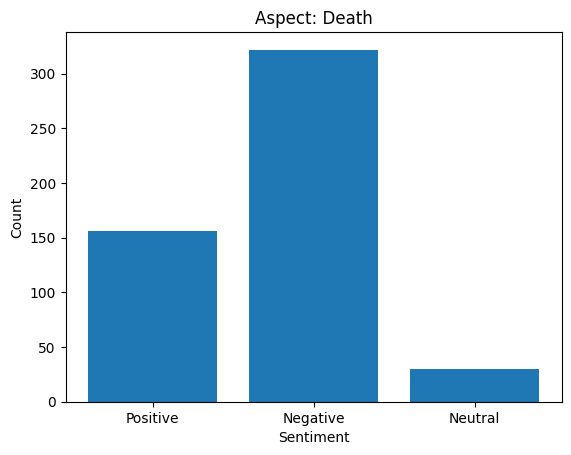

In [11]:
# Initialize sentiment counts for each aspect
sentiment_counts = {aspect: {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0} for aspect in aspects}
total_sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0}
# Update sentiment counts for each aspect
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1
        
# Aggregate sentiment counts across all aspects
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1

del total_sentiment_counts['NA']
# Plot the graph for total sentiment counts
plt.bar(total_sentiment_counts.keys(), total_sentiment_counts.values())
plt.title("Aspect: Death")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

1. Death
2. Injury
3. Property Damage
4. Rescue Efforts
5. Fear and Panic
6. Relief and Support
7. Food Availability
8. Shelter
9. Government Response
10. Requests for Help
11. Basic Needs


Please enter the number corresponding to the array you want to proceed with:  2


Selected array: ['injured', 'injuries', 'injury', 'hurt', 'wounded', 'bleeding']


Processing Tweets: 100%|███████████████████████████████████████████████████████████| 5182/5182 [03:01<00:00, 28.56it/s]


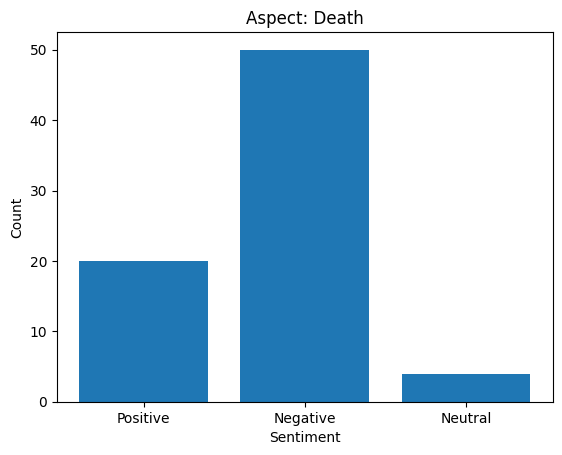

In [12]:
for idx, aspect in enumerate(aspects.keys()):
    print(f"{idx + 1}. {aspect}")

# Ask the user to choose an array
selected_index = int(input("Please enter the number corresponding to the array you want to proceed with: ")) - 1

# Get the selected array based on the index provided by the user
selected_array = list(aspects.values())[selected_index]

# Display the selected array
print("Selected array:", selected_array)

sentiments = []  # List to store sentiments for each aspect

# Loop through each row in the DataFrame with a progress bar
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Tweets"):
    tweet_text = row['processed_text']
    
    aspect_sentiments = {}  # Dictionary to store sentiment for each aspect in the current tweet
    
    for aspect in selected_array:
        sentiment = absa(tweet_text, aspect)  # Assuming absa() function returns sentiment for given aspect
        aspect_sentiments[aspect] = sentiment
        
    sentiments.append(aspect_sentiments)

sentiment_counts = {aspect: {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0} for aspect in aspects}
total_sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0}
# Update sentiment counts for each aspect
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1
        
# Aggregate sentiment counts across all aspects
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1

del total_sentiment_counts['NA']
# Plot the graph for total sentiment counts
plt.bar(total_sentiment_counts.keys(), total_sentiment_counts.values())
plt.title("Aspect: Death")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

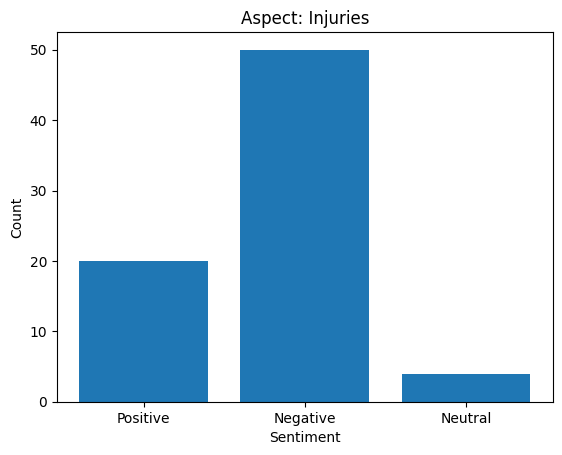

In [13]:
plt.bar(total_sentiment_counts.keys(), total_sentiment_counts.values())
plt.title("Aspect: Injuries")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [14]:
for idx, aspect in enumerate(aspects.keys()):
    print(f"{idx + 1}. {aspect}")

# Ask the user to choose an array
selected_index = int(input("Please enter the number corresponding to the array you want to proceed with: ")) - 1

# Get the selected array based on the index provided by the user
selected_array = list(aspects.values())[selected_index]

# Display the selected array
print("Selected array:", selected_array)

sentiments = []  # List to store sentiments for each aspect

# Loop through each row in the DataFrame with a progress bar
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Tweets"):
    tweet_text = row['processed_text']
    
    aspect_sentiments = {}  # Dictionary to store sentiment for each aspect in the current tweet
    
    for aspect in selected_array:
        sentiment = absa(tweet_text, aspect)  # Assuming absa() function returns sentiment for given aspect
        aspect_sentiments[aspect] = sentiment
        
    sentiments.append(aspect_sentiments)

sentiment_counts = {aspect: {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0} for aspect in aspects}
total_sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0}
# Update sentiment counts for each aspect
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1
        
# Aggregate sentiment counts across all aspects
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1

1. Death
2. Injury
3. Property Damage
4. Rescue Efforts
5. Fear and Panic
6. Relief and Support
7. Food Availability
8. Shelter
9. Government Response
10. Requests for Help
11. Basic Needs


Please enter the number corresponding to the array you want to proceed with:  3


Selected array: ['damage', 'destroyed', 'ruined', 'collapsed', 'broken', 'infrastructure', 'roads', 'bridges']


Processing Tweets: 100%|███████████████████████████████████████████████████████████| 5182/5182 [04:02<00:00, 21.37it/s]


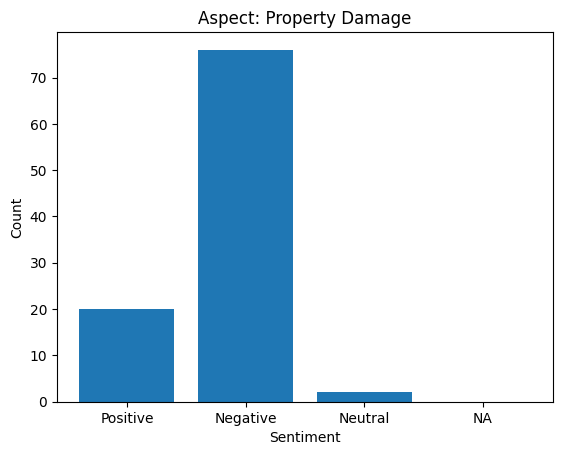

In [15]:
plt.bar(total_sentiment_counts.keys(), total_sentiment_counts.values())
plt.title("Aspect: Property Damage")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [16]:
for idx, aspect in enumerate(aspects.keys()):
    print(f"{idx + 1}. {aspect}")

# Ask the user to choose an array
selected_index = int(input("Please enter the number corresponding to the array you want to proceed with: ")) - 1

# Get the selected array based on the index provided by the user
selected_array = list(aspects.values())[selected_index]

# Display the selected array
print("Selected array:", selected_array)

sentiments = []  # List to store sentiments for each aspect

# Loop through each row in the DataFrame with a progress bar
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Tweets"):
    tweet_text = row['processed_text']
    
    aspect_sentiments = {}  # Dictionary to store sentiment for each aspect in the current tweet
    
    for aspect in selected_array:
        sentiment = absa(tweet_text, aspect)  # Assuming absa() function returns sentiment for given aspect
        aspect_sentiments[aspect] = sentiment
        
    sentiments.append(aspect_sentiments)

sentiment_counts = {aspect: {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0} for aspect in aspects}
total_sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0}
# Update sentiment counts for each aspect
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1
        
# Aggregate sentiment counts across all aspects
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1

1. Death
2. Injury
3. Property Damage
4. Rescue Efforts
5. Fear and Panic
6. Relief and Support
7. Food Availability
8. Shelter
9. Government Response
10. Requests for Help
11. Basic Needs


Please enter the number corresponding to the array you want to proceed with:  4


Selected array: ['rescue', 'rescued', 'rescuing', 'aid', 'assistance', 'help']


Processing Tweets: 100%|███████████████████████████████████████████████████████████| 5182/5182 [03:04<00:00, 28.16it/s]


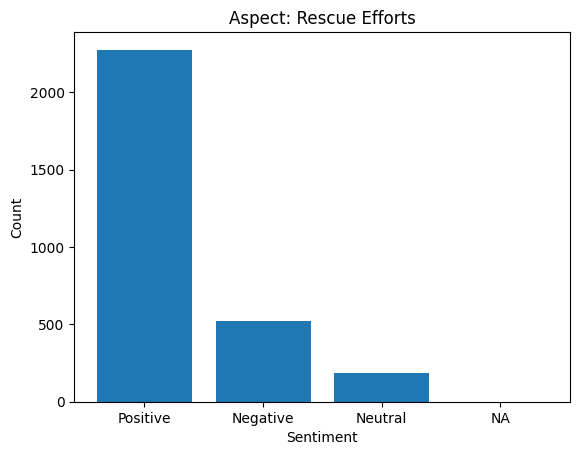

In [17]:
plt.bar(total_sentiment_counts.keys(), total_sentiment_counts.values())
plt.title("Aspect: Rescue Efforts")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [18]:
for idx, aspect in enumerate(aspects.keys()):
    print(f"{idx + 1}. {aspect}")

# Ask the user to choose an array
selected_index = int(input("Please enter the number corresponding to the array you want to proceed with: ")) - 1

# Get the selected array based on the index provided by the user
selected_array = list(aspects.values())[selected_index]

# Display the selected array
print("Selected array:", selected_array)

sentiments = []  # List to store sentiments for each aspect

# Loop through each row in the DataFrame with a progress bar
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Tweets"):
    tweet_text = row['processed_text']
    
    aspect_sentiments = {}  # Dictionary to store sentiment for each aspect in the current tweet
    
    for aspect in selected_array:
        sentiment = absa(tweet_text, aspect)  # Assuming absa() function returns sentiment for given aspect
        aspect_sentiments[aspect] = sentiment
        
    sentiments.append(aspect_sentiments)

sentiment_counts = {aspect: {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0} for aspect in aspects}
total_sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0}
# Update sentiment counts for each aspect
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1
        
# Aggregate sentiment counts across all aspects
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1

1. Death
2. Injury
3. Property Damage
4. Rescue Efforts
5. Fear and Panic
6. Relief and Support
7. Food Availability
8. Shelter
9. Government Response
10. Requests for Help
11. Basic Needs


Please enter the number corresponding to the array you want to proceed with:  5


Selected array: ['fear', 'panic', 'terrified', 'scared', 'frightened', 'trauma', 'PTSD', 'stress', 'anxiety']


Processing Tweets: 100%|███████████████████████████████████████████████████████████| 5182/5182 [04:42<00:00, 18.36it/s]


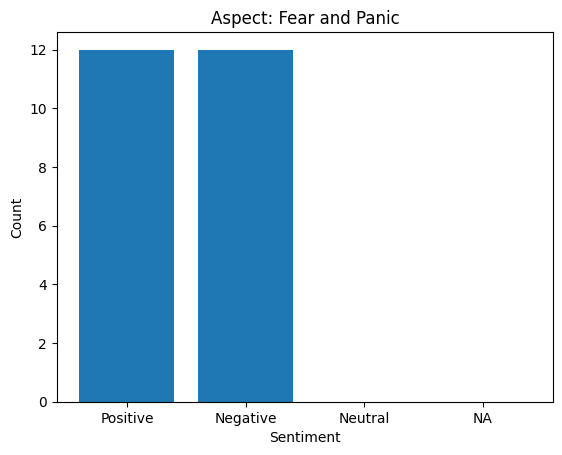

In [19]:
plt.bar(total_sentiment_counts.keys(), total_sentiment_counts.values())
plt.title("Aspect: Fear and Panic")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [20]:
for idx, aspect in enumerate(aspects.keys()):
    print(f"{idx + 1}. {aspect}")

# Ask the user to choose an array
selected_index = int(input("Please enter the number corresponding to the array you want to proceed with: ")) - 1

# Get the selected array based on the index provided by the user
selected_array = list(aspects.values())[selected_index]

# Display the selected array
print("Selected array:", selected_array)

sentiments = []  # List to store sentiments for each aspect

# Loop through each row in the DataFrame with a progress bar
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Tweets"):
    tweet_text = row['processed_text']
    
    aspect_sentiments = {}  # Dictionary to store sentiment for each aspect in the current tweet
    
    for aspect in selected_array:
        sentiment = absa(tweet_text, aspect)  # Assuming absa() function returns sentiment for given aspect
        aspect_sentiments[aspect] = sentiment
        
    sentiments.append(aspect_sentiments)

sentiment_counts = {aspect: {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0} for aspect in aspects}
total_sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0}
# Update sentiment counts for each aspect
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1
        
# Aggregate sentiment counts across all aspects
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1

1. Death
2. Injury
3. Property Damage
4. Rescue Efforts
5. Fear and Panic
6. Relief and Support
7. Food Availability
8. Shelter
9. Government Response
10. Requests for Help
11. Basic Needs


Please enter the number corresponding to the array you want to proceed with:  6


Selected array: ['relief', 'support', 'help', 'assistance', 'aid']


Processing Tweets: 100%|███████████████████████████████████████████████████████████| 5182/5182 [02:35<00:00, 33.43it/s]


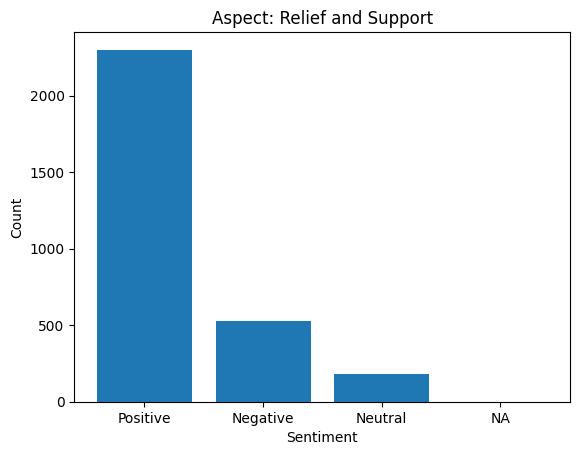

In [21]:
plt.bar(total_sentiment_counts.keys(), total_sentiment_counts.values())
plt.title("Aspect: Relief and Support")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [22]:
for idx, aspect in enumerate(aspects.keys()):
    print(f"{idx + 1}. {aspect}")

# Ask the user to choose an array
selected_index = int(input("Please enter the number corresponding to the array you want to proceed with: ")) - 1

# Get the selected array based on the index provided by the user
selected_array = list(aspects.values())[selected_index]

# Display the selected array
print("Selected array:", selected_array)

sentiments = []  # List to store sentiments for each aspect

# Loop through each row in the DataFrame with a progress bar
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Tweets"):
    tweet_text = row['processed_text']
    
    aspect_sentiments = {}  # Dictionary to store sentiment for each aspect in the current tweet
    
    for aspect in selected_array:
        sentiment = absa(tweet_text, aspect)  # Assuming absa() function returns sentiment for given aspect
        aspect_sentiments[aspect] = sentiment
        
    sentiments.append(aspect_sentiments)

sentiment_counts = {aspect: {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0} for aspect in aspects}
total_sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0}
# Update sentiment counts for each aspect
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1
        
# Aggregate sentiment counts across all aspects
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1

1. Death
2. Injury
3. Property Damage
4. Rescue Efforts
5. Fear and Panic
6. Relief and Support
7. Food Availability
8. Shelter
9. Government Response
10. Requests for Help
11. Basic Needs


Please enter the number corresponding to the array you want to proceed with:  7


Selected array: ['food', 'hungry', 'starving', 'food shortage', 'meal']


Processing Tweets: 100%|███████████████████████████████████████████████████████████| 5182/5182 [02:35<00:00, 33.22it/s]


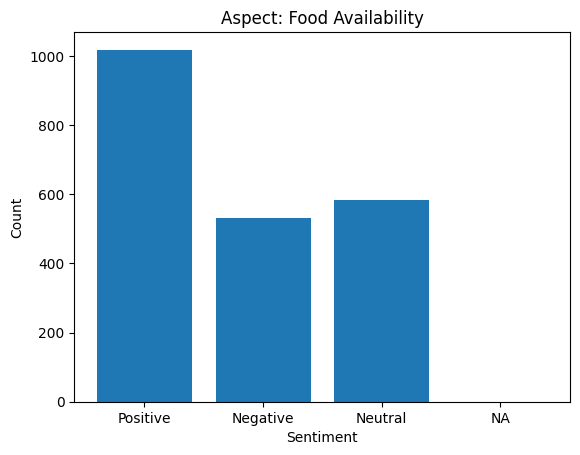

In [23]:
plt.bar(total_sentiment_counts.keys(), total_sentiment_counts.values())
plt.title("Aspect: Food Availability")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [24]:
for idx, aspect in enumerate(aspects.keys()):
    print(f"{idx + 1}. {aspect}")

# Ask the user to choose an array
selected_index = int(input("Please enter the number corresponding to the array you want to proceed with: ")) - 1

# Get the selected array based on the index provided by the user
selected_array = list(aspects.values())[selected_index]

# Display the selected array
print("Selected array:", selected_array)

sentiments = []  # List to store sentiments for each aspect

# Loop through each row in the DataFrame with a progress bar
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Tweets"):
    tweet_text = row['processed_text']
    
    aspect_sentiments = {}  # Dictionary to store sentiment for each aspect in the current tweet
    
    for aspect in selected_array:
        sentiment = absa(tweet_text, aspect)  # Assuming absa() function returns sentiment for given aspect
        aspect_sentiments[aspect] = sentiment
        
    sentiments.append(aspect_sentiments)

sentiment_counts = {aspect: {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0} for aspect in aspects}
total_sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0}
# Update sentiment counts for each aspect
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1
        
# Aggregate sentiment counts across all aspects
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1

1. Death
2. Injury
3. Property Damage
4. Rescue Efforts
5. Fear and Panic
6. Relief and Support
7. Food Availability
8. Shelter
9. Government Response
10. Requests for Help
11. Basic Needs


Please enter the number corresponding to the array you want to proceed with:  8


Selected array: ['shelter', 'housing', 'homeless', 'evacuation center', 'temporary shelter', 'house', 'home']


Processing Tweets: 100%|███████████████████████████████████████████████████████████| 5182/5182 [03:43<00:00, 23.14it/s]


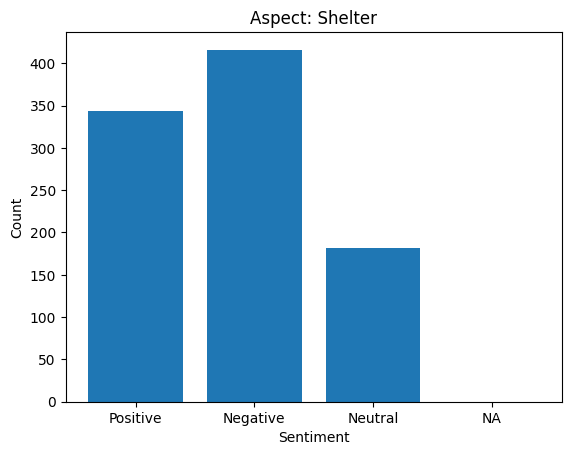

In [25]:
plt.bar(total_sentiment_counts.keys(), total_sentiment_counts.values())
plt.title("Aspect: Shelter")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [26]:
for idx, aspect in enumerate(aspects.keys()):
    print(f"{idx + 1}. {aspect}")

# Ask the user to choose an array
selected_index = int(input("Please enter the number corresponding to the array you want to proceed with: ")) - 1

# Get the selected array based on the index provided by the user
selected_array = list(aspects.values())[selected_index]

# Display the selected array
print("Selected array:", selected_array)

sentiments = []  # List to store sentiments for each aspect

# Loop through each row in the DataFrame with a progress bar
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Tweets"):
    tweet_text = row['processed_text']
    
    aspect_sentiments = {}  # Dictionary to store sentiment for each aspect in the current tweet
    
    for aspect in selected_array:
        sentiment = absa(tweet_text, aspect)  # Assuming absa() function returns sentiment for given aspect
        aspect_sentiments[aspect] = sentiment
        
    sentiments.append(aspect_sentiments)

sentiment_counts = {aspect: {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0} for aspect in aspects}
total_sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0}
# Update sentiment counts for each aspect
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1
        
# Aggregate sentiment counts across all aspects
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1

1. Death
2. Injury
3. Property Damage
4. Rescue Efforts
5. Fear and Panic
6. Relief and Support
7. Food Availability
8. Shelter
9. Government Response
10. Requests for Help
11. Basic Needs


Please enter the number corresponding to the array you want to proceed with:  9


Selected array: ['government', 'officials', 'response', 'relief efforts', 'emergency services']


Processing Tweets: 100%|███████████████████████████████████████████████████████████| 5182/5182 [02:37<00:00, 32.91it/s]


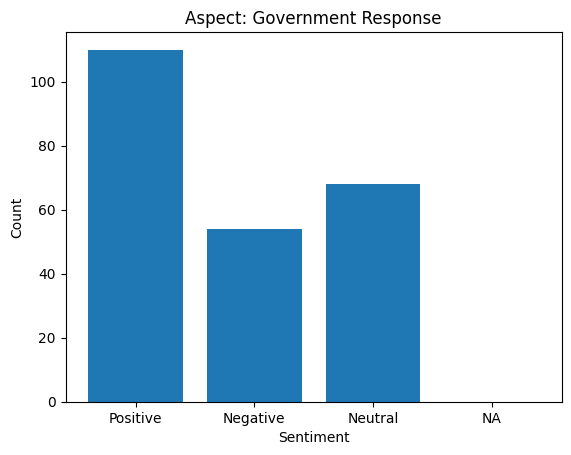

In [27]:
plt.bar(total_sentiment_counts.keys(), total_sentiment_counts.values())
plt.title("Aspect: Government Response")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [28]:
for idx, aspect in enumerate(aspects.keys()):
    print(f"{idx + 1}. {aspect}")

# Ask the user to choose an array
selected_index = int(input("Please enter the number corresponding to the array you want to proceed with: ")) - 1

# Get the selected array based on the index provided by the user
selected_array = list(aspects.values())[selected_index]

# Display the selected array
print("Selected array:", selected_array)

sentiments = []  # List to store sentiments for each aspect

# Loop through each row in the DataFrame with a progress bar
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Tweets"):
    tweet_text = row['processed_text']
    
    aspect_sentiments = {}  # Dictionary to store sentiment for each aspect in the current tweet
    
    for aspect in selected_array:
        sentiment = absa(tweet_text, aspect)  # Assuming absa() function returns sentiment for given aspect
        aspect_sentiments[aspect] = sentiment
        
    sentiments.append(aspect_sentiments)

sentiment_counts = {aspect: {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0} for aspect in aspects}
total_sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'NA': 0}
# Update sentiment counts for each aspect
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1
        
# Aggregate sentiment counts across all aspects
for aspect_sentiments in sentiments:
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment != 'NA':  # Exclude the last sentiment
            total_sentiment_counts[sentiment] += 1

1. Death
2. Injury
3. Property Damage
4. Rescue Efforts
5. Fear and Panic
6. Relief and Support
7. Food Availability
8. Shelter
9. Government Response
10. Requests for Help
11. Basic Needs


Please enter the number corresponding to the array you want to proceed with:  11


Selected array: ['basic needs', 'water', 'clothing', 'medicine', 'medical supplies']


Processing Tweets: 100%|███████████████████████████████████████████████████████████| 5182/5182 [02:40<00:00, 32.34it/s]


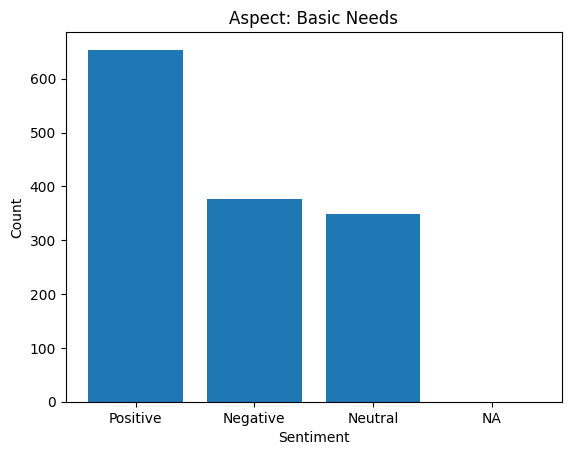

In [29]:
plt.bar(total_sentiment_counts.keys(), total_sentiment_counts.values())
plt.title("Aspect: Basic Needs")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()